
<table>
  <tr>
    <td> <center><img src="images/header1.png" width=400></center> </td>
  </tr>
</table>

<h1><center>Основы машинного обучения</center></h1>
<hr>
<h2><center>Методы обучения без учителя: кластеризация</center></h2>
<h3><center>Ефимов Владислав</center></h3>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print('Так надо')

# Методы обучения без учителя (unsupervised)

* В чём отличие от supervised методов?

* Кластеризация
* Уменьшение размерности
    * Метод главных компонент
    * Многомерное шкалирование
    * Тематические модели
* Поиск ассоциативных правил

# Кластеризация

Основная задача кластерного анализа — разбиение исходного набора объектов на группы (кластеры) таким образом, чтобы объекты в группе были похожи друг на друга, а объекты из разных групп отличались.

<center><img src="https://i.ytimg.com/vi/zPJtDohab-g/maxresdefault.jpg" width=600></center>

## Цели кластерного анализа

* **Поиск структуры** в данных и её **интерпретация**
* Поиск аномальных объектов
* Детальный анализ отдельных кластеров
* Формирование признаков на основе кластеризации

## Use Case: Telegram Clustering Contest
1. Traverse an input directory and parse all HTML files (articles) in it with news content
2. Detect article language and filter out articles which are not in English or Russian
3. Classify articles into one or several of 7 categories: society, economy, technology, sports, entertainment, science, other
4. Filter out articles which are not news (e.g. how-tos, tips, encyclopedic content)
5. Group articles into threads. Thread is just a collection of articles about the same event
6. Sort articles within a thread by relevance
7. Sort threads by importance

2nd Place solution [description](https://medium.com/@alexkuznetsov/2nd-place-solution-for-telegram-data-clustering-contest-f28d55b98d30)

## Группы методов

* Методы, основанные на прототипах
    * Каждый кластер ассоциируется с виртуальным "эталонным" объектом
* Иерархические методы
    * Не простое разбиение, а целая иерархия
* Плотностные методы
    * Ищем плотные скопления точек в признаковом пространстве
* Вероятностные методы
    * Предполагаем, что данные порождены некоторой смесью вероятностных распределений
* Спектральные методы
    * Испольюзуем замечательные спектральные свойства разных матриц
* Сеточные методы
    * Бьем признаковое пространство на сегменты
* ...

## Алгоритм [k-means](https://scikit-learn.org/stable/modules/clustering.html#k-means)
### Неформальное [демо](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

## Постановка

* Дано множество объектов $X = \{x_1, x_2, \dots, x_N\}$
* Кластер $C_k \Leftrightarrow \text{ центроид } \mu_k$
* Объект $x_i \in C_k \Leftrightarrow \mu_k = \arg \min\limits_{\mu_j} \|x_i - \mu_j \|^2$
* Надо найти такое разбиение на $K$ кластеров, чтобы минимизировать функционал:
$$ L(C) = \sum_{k=1}^K\sum_{i\in C_k} ||x_i - \mu_k||^2 \rightarrow \min\limits_C $$
$$\mu_k = \frac{1}{|C_k|} \sum _{x_n \in C_k} x_n$$

* Метод $k$-средних является итеративным алгоритмом разбиения множества объектов на $K$ кластеров 

## Описание алгоритма
1. Выбрать $K$ начальных центроидов случайным образом  $\rightarrow \mu_k, \ k=1\dots K$
2. Для каждой точки из датасета присвоить кластер, соответствующий ближайшему центроиду:
$$C_k = \{x_n : ||x_n - \mu_k||^2 \leq ||x_n - \mu_l||^2 \quad \forall l \neq k \} $$
3. Обновить центроиды: 
$$\mu_k = \frac{1}{|C_k|} \sum _{x_n \in C_k} x_n$$
4. Повторять 2 и 3 до тех пор, пока изменения перестанут быть существенными 


<center><img src='images/Kmeans_animation.gif' width=500></center>

# Основные факторы
* Начальная инициализация центроидов
* Количество кластеров

## Kак выбрать K?

* Не пользоваться обычным k-means (X-means, ik-means)
* Посмотреть на меры качества кластеризации
* Воспользоваться эвристиками

## Elbow Method («метод локтя»)

* Критерий минимизации k-means:
$$ L(C) = \sum_{k=1}^K\sum_{i\in C_k} ||x_i - \mu_k||^2 \rightarrow \min\limits_C $$
* Давайте возьмём все возможные $K$, для каждого запустим алгоритм, посчитаем на результате $L(C)$ и выберем минимум!

* Ничего не выйдет... Почему?

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 


crit = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    crit.append(np.sqrt(kmeans.inertia_))
    
def elbow_demo(k=2):
    
    X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
    
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].scatter(X[:,0], X[:,1], c=kmeans.labels_)
    
    ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                  marker='o', c="white", alpha=1, s=200)
    
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')

    for i, c in enumerate(kmeans.cluster_centers_):
        ax[0].scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        
    ax[1].plot(range(2,8), crit, marker='s')
    
    ax[1].set_xlabel('$k$')
    ax[1].set_ylabel('$L^{(k)}(C)$')
    
    plt.show()
    
    

## Итоговая эвристика

* Выбирают такое $k$, после которого функционал $L(C)$ уменьшается не слишком быстро.
* Чуть более формально, значение функционала невелико:
$$ D(k) = \frac{|L^{(k)}(C) - L^{(k+1)}(C)|}{|L^{(k-1)}(C) - L^{(k)}(C)|} $$

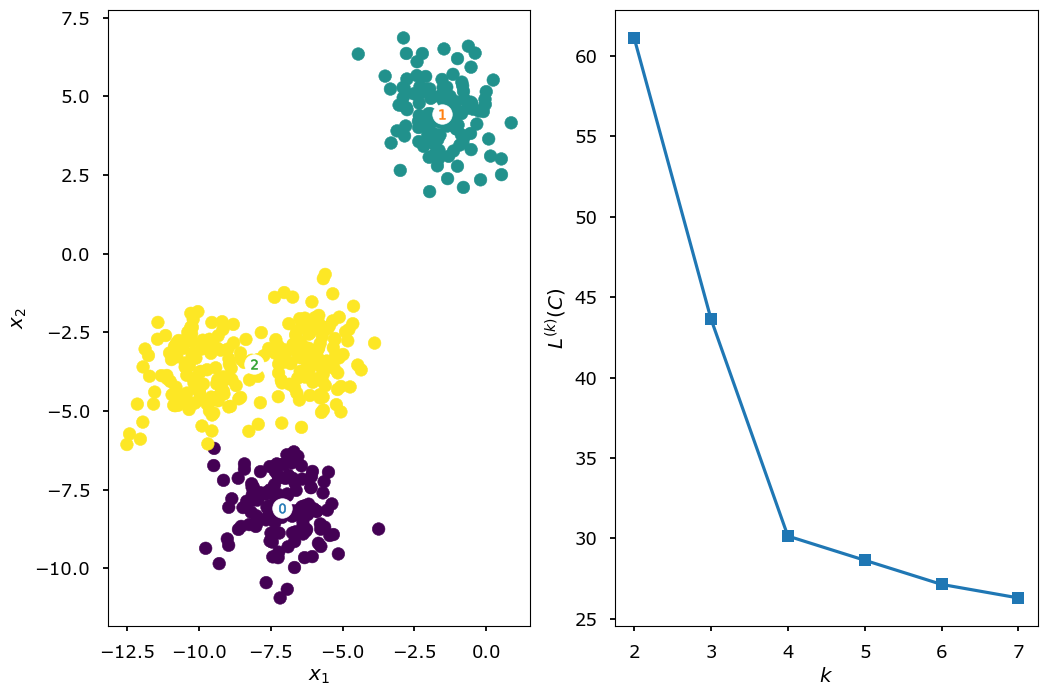

interactive(children=(IntSlider(value=3, description='k', max=8, min=3), Output()), _dom_classes=('widget-inte…

In [5]:
plot = interact(elbow_demo, k=IntSlider(min=3,max=8,step=1,value=2))

## Важно!
* Эвристика и меры качества кластеризации носят лишь рекомендательный характер!
* Если они ничего не дают, то лучше ориентироваться на свои знания в предметной области.
* Или выжать из полученной кластеризации максимум.
    * *3 из 5 полученных кластеров интерпретируются — и то хорошо.*

## Начальная инициализация центройдов
* Выбрать координаты $K$ случайных объектов из датасета.
    * Производить случайные запуски много раз и выбрать наиболее оптимальную инициализацию.
* Использовать результат другой кластеризации на $K$ кластеров.
* k-means++.

### K-means++
* Первый центроид выбираем случайным образом из объектов датасета.
* Для каждой точки рассчитываем расстояние $d_{\min}(x_i) = \min_{\mu_j} \|x_i - \mu_j\|^2$.
* Точка назначается следующим центроидом с вероятностью $p(x_i) \propto d_{\min}(x_i)$.

In [6]:
from sklearn.metrics import pairwise_distances

def demo_kmpp(iters=1):

    X, y = make_blobs(n_samples=550, cluster_std=1.5, n_features=2, centers=5, random_state=12345)

    X_grid1, X_grid2 = np.meshgrid(np.linspace(-12, 18, 500),
                                   np.linspace(-11, 8, 500))

    XX = np.c_[X_grid1.flatten(), X_grid2.flatten()]
    np.random.seed(1)
    centroids = np.empty((0, 2))

    for i in range(iters):
        if i == 0:
            d = np.ones_like(y, dtype=float)
        else:
            d = pairwise_distances(X, centroids, metric='euclidean').min(axis=1)
        weights = d/d.sum()

        centroid_idx = np.random.choice(X.shape[0], size=1, replace=False, p=weights)[0]
        centroids = np.r_[centroids, X[centroid_idx, np.newaxis]]

    d_grid = pairwise_distances(XX, centroids, metric='euclidean').min(axis=1)

    d_grid = d_grid.reshape(X_grid1.shape)
    d_grid = d_grid/d_grid.max()

    levels = np.linspace(0, 1, 100)

    plt.contourf(X_grid1, X_grid2, d_grid, cmap=plt.cm.Blues, alpha=0.7, levels=levels)
    plt.scatter(X[:, 0], X[:, 1], s=100)

    centers = centroids
    
    plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=500, edgecolor='k')

    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1,
                    s=100, edgecolor='k')

    plt.xlabel('$x_1$', fontsize=15)
    plt.ylabel('$x_2$', fontsize=15)

    plt.tight_layout()
    plt.axis('equal')
    plt.show()


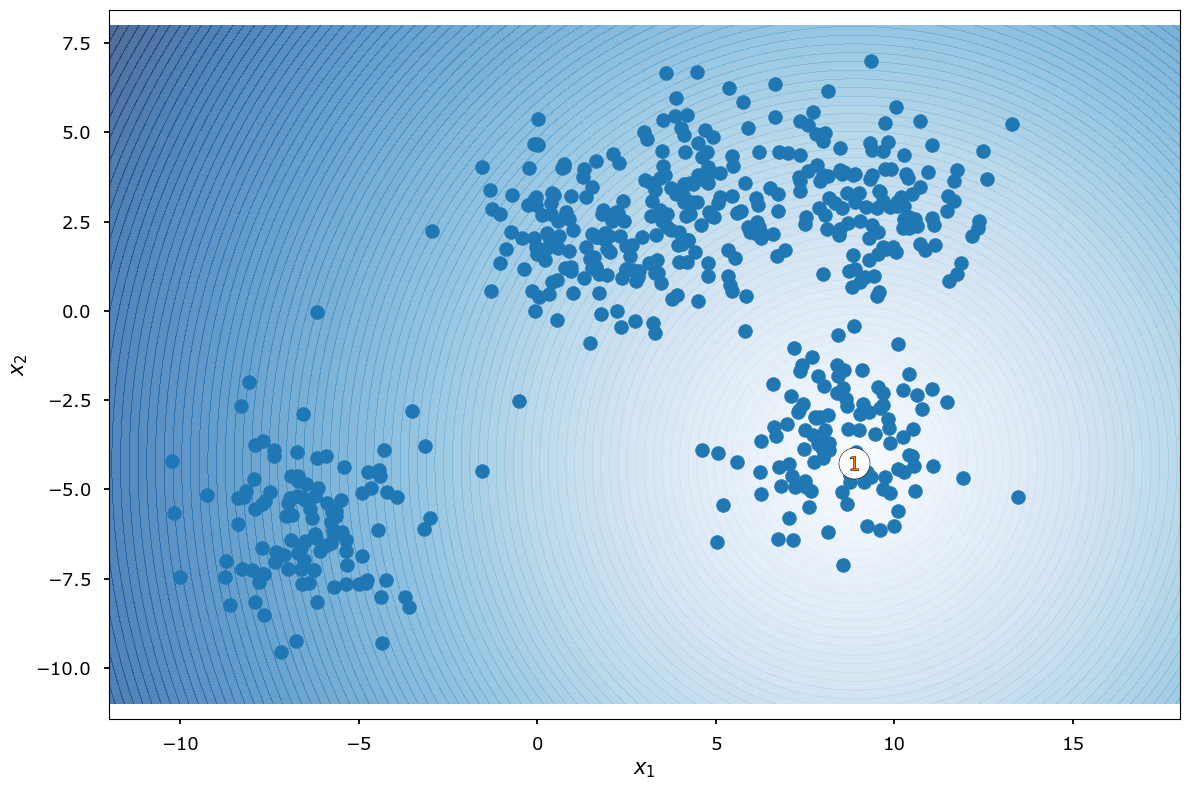

interactive(children=(IntSlider(value=1, description='iters', max=6, min=1), Output()), _dom_classes=('widget-…

<function __main__.demo_kmpp(iters=1)>

In [7]:
interact(demo_kmpp, iters=IntSlider(min=1,max=6,step=1,value=1))

## Резюме

* Метод k-средних — жадный итеративный алгоритм.
* Зависит от начальных центроидов и их количества.

#### Преимущества
* Прост.
* Имеет множество модификаций.
* Интерпретация кластеров через центроиды.

#### Недостатки

* Подразумевает выпуклые кластеры.
<center><img src='images/kmeans_2moons.png' width=800></center>

* Почти всегда на выходе будет k кластеров.
<center><img src='images/kmeans_digits.png' width=800></center>

# Иерархические алгоритмы: [Agglomerative Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

## Основная идея

* Идём снизу вверх, вначале все точки в своём кластере.
* На каждом шаге объединяем два ближайших кластера.
* Продолжаем, пока не дойдём до корня.

<center><img src='images/sphx_glr_plot_agglomerative_dendrogram_001.png'></center>

## Что значит ближайшие кластеры, как мерить расстояние?
Есть несколько стратегий, которые можно использовать для объединения кластеров:
1. Ward — минимизирует расстояния между точками в одном кластере: $\sum_{x, y \in c} ||x - y||^2 \to \min$
2. Complete (maximum) linkage — минимизирует максимальное расстояние между точками разных кластеров: $$\min_{c_1 \neq c_2 \in C} \max_{x \in c_1, y \in c_2} \rho(x, y)$$
3. Average linkage — минимизирует среднее расстояние между точками разных кластеров: $$\min_{c_1 \neq c_2 \in C} \frac{1}{|c_1|}\sum_{x \in c_1} \frac{1}{|c_2|}\sum_{y \in c_2} \rho(x, y)$$
4. Single linkage — минимизирует расстояние между ближайшими точками разных кластеров: $$\min_{c_1 \neq c_2 \in C} \min_{x \in c_1, y \in c_2} \rho(x, y)$$

## Примеры применения разных подходов
<center><img src='images/sphx_glr_plot_linkage_comparison_001.png'></center>

# Алгоритмы, основанные на плотности: [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

## Хотелось бы...

Получить кластеры высокой плотности, разделённые участками низкой плотности

<center><img src='images/dbscan.png'></center>



## Основная идея

* Для каждой точки кластера её окрестность заданного радиуса $\epsilon$ должна содержать не менее некоторого числа точек `min_pts`. 
* C такой точки можно начать расширение «плотного» кластера:
    * то есть каждая точка в $\epsilon$ окрестности будет добавляться в кластер.
    * её соседи тоже будут проверяться на критерий `min_pts`.
* Расширение текущего кластера закончится, когда объекты перестанут удовлетворять условию `min_pts`

## Demo
Иногда вместо тысячи слов лучше один раз посмотреть, как алгоритм работает. Но с небольшими комментариями.


[Тык](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

## Типы точек
* Core point: точки, в $\varepsilon$-окрестности которых $\ge$ `min_pts` точек.
* Border point: не core, но содержит хотя бы 1 core-точку в $\varepsilon$-окрестности.
* Noise point: всё остальное.
<center><img src='images/dbscan_points_types.png'></center>

## DBSCAN

```{C}
1.function dbscan(X, eps, min_pts):
2.	initialize NV = X # not visited objects	
3.	for x in NV:
4.		remove(NV, x) # mark as visited
5.		nbr = neighbours(x, eps) # set of neighbours
6.		if nbr.size < min_pts:
7.			mark_as_noise(x)
8.		else:
9.			C = new_cluster() 
10.			expand_cluster(x, nbr, C, eps, min_pts, NV)
11.			yield C
```

##  expand_cluster

```{C}
1. function expand_cluster(x, nbr, C, eps, min_pts, NV):
2.	add(x, C)
3.	for x1 in nbr:
4.		if x1 in NV: # object not visited
5.			remove(NV, x1) # mark as visited
6.			nbr1 = neighbours(x1, eps)
7.			if nbr1.size >= min_pts:
8.				# join sets of neighbours
9.				merge(nbr, nbr_1)
10.		if x1 not in any cluster:
11.			add(x1, C)		
```

In [8]:
from sklearn.cluster import DBSCAN


data = np.loadtxt('data/flame.txt')
X_data = data[:, :2]

def dbscan_demo(eps=1, min_pts=5):
    
    dbscan = DBSCAN(eps=eps, min_samples=min_pts).fit(X_data)
    
    labels = dbscan.labels_
    
    plt.figure(figsize=(7,5))
    plt.scatter(X_data[:,0], X_data[:, 1], c=labels)
    
    plt.show()
    

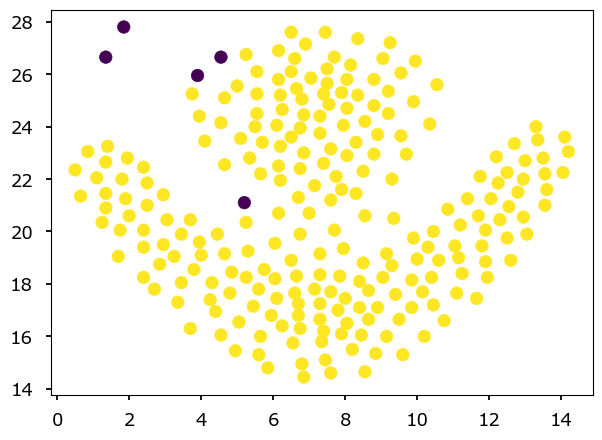

interactive(children=(FloatSlider(value=1.0, description='eps', max=10.0, min=0.1, step=0.05), IntSlider(value…

<function __main__.dbscan_demo(eps=1, min_pts=5)>

In [9]:
interact(dbscan_demo, eps=FloatSlider(min=0.1, max=10, step=0.05, value=1), min_pts=IntSlider(min=2, max=15, step=1, value=5))

## Итог

#### Преимущества
* Не требует $K$
* Кластеры произвольной формы
* Учитывает выбросы


#### Недостатки
* Не работает при различных плотностях кластеров
* Не всегда выявит кластеры

<center><img src='images/diff-dens.png'></center>

# Алгоритмы, основанные на плотности: [HDBSCAN](https://scikit-learn.org/stable/modules/clustering.html#hdbscan)

## Мотивация
Хотелось бы всё-таки искать кластеры среди точек разной плотности.

## Модифицируем расстояние


* По сути, мы пытаемся найти «островки» повышенной плотности среди всего
разреженного «моря» точек.
* Давайте разнесём наше «море» и «острова» подальше друг от друга, то есть
сделаем «море» ещё более разреженным, а точки внутри «островов» не будем
трогать.
* Введём новое расстояние доступности (Reachability):
$$d_{\mathrm{mreach-}k}(a,b) = \max \{\mathrm{core}_k(a), \mathrm{core}_k(b), d(a,b) \},$$
где $\mathrm{core}_k(a)$ — core-расстояние точки a, как в DBSCAN, $d(a,b)$ — оригинальное расстояние между точками.

<center><img src='images/distance3.svg'></center>

<center><img src='images/distance4a.svg'></center>

<center><img src='images/distance5.svg'></center>

## Минимальное остовное дерево

* Строим по полученным новым расстояниям граф (вершина — исходная точка, ребро соединяет две точки с весом $d_{\mathrm{mreach-}k}(a,b)$).
* Получим большой граф, который надо уменьшить. Можно при построении сразу выкидывать ребра больше некоторого $\epsilon$.
* Построим минимальное остовное дерево, например, с помощью [алгоритма Прима](https://ru.wikipedia.org/wiki/Алгоритм_Прима).

<center><img src='images/how_hdbscan_works_10_1.webp'></center>

## Строим иерархию

* Идём снизу вверх, как обычно, а именно от самых коротких к самым длинным рёбрам.
* Объединяем рёбра в кластеры, используя структуру Union-Find.

<center><img src='images/how_hdbscan_works_12_1.webp'></center>

## Конденсируем дерево

* Идём сверху вниз и анализируем ветвления.
* Точки либо просто отваливаются (один из кластеров < min_cluster_size), либо образуют два полноценных кластера.

<center><img src='images/how_hdbscan_works_15_1.webp'></center>

## Выделяем кластеры

* Хотим видеть в качестве кластеров наиболее долгоживущие.
* Не хотим учитывать кластеры с малым временем жизни: это, скорее всего, какие-то артефакты.
* Если выбираем вершину в качестве кластера, то мы не можем далее выбрать её «потомков» в качестве отдельных кластеров.
* Условно считаем площади этих «сосулек». Если площадь «детей» больше площади «родителя», то разделение правомерно, и мы считаем площадью «родителя» сумму его «детей». Иначе разделение плохое — склеиваем обратно.

<center><img src='images/how_hdbscan_works_18_1.webp'></center>

## Пример на данных
<center><img src='images/how_hdbscan_works_20_1.webp'></center>

Более подробно можно почитать [официальной документации](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html).

## Итог

#### Преимущества
* Не требует $K$
* Кластеры произвольной формы
* Учитывает выбросы
* Работает при различных плотностях кластеров


#### Недостатки
* Не всегда выявит кластеры

# [Gaussian Mixture](https://scikit-learn.org/stable/modules/mixture.html#gaussian-mixture-models)

## Идея

* Предположим, что наши данные — это смесь данных из разных гауссовых распределений.
* Тогда можем попытаться оценить параметры этих распределений, основываясь на ММП:
$${ L({\boldsymbol {\theta }};\mathbf {X} )=p(\mathbf {X} \mid {\boldsymbol {\theta }})=\int p(\mathbf {X} ,\mathbf {Z} \mid {\boldsymbol {\theta }})\,d\mathbf {Z} =\int p(\mathbf {X} \mid \mathbf {Z} ,{\boldsymbol {\theta }})p(\mathbf {Z} \mid {\boldsymbol {\theta }})\,d\mathbf {Z} }$$
* Для оценки параметров распределений используется EM-алгоритм.
* Можно думать об алгоритме как о некотором обобщении k-means.

<center><img src='images/sphx_glr_plot_gmm_pdf_001.png'></center>

## Параметры алгоритма

* n_components: количество компонент (распределений), из которых состоят данные.
* covariance_type: тип ковариаций (задает ограничения на форму).
* init_params: инициализация параметров (лучше оставлять по умолчанию).

<center>
    <img src='images/sphx_glr_plot_gmm_covariances_001.png'>
    <img src='images/sphx_glr_plot_gmm_init_001.png'>
</center>

## Итог

#### Преимущества
* Один из самых быстрых алгоритмов.
* Может работать с разными формами гауссовых распределений.


#### Недостатки
* Нужно знать параметр $k$.
* Ограничение на «гауссовость» данных.
* Может расходиться на компонентах с очень высокой плотностью.

# [Spectral Clustering](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering)
## Идея, граф на данных

* Вернёмся к идее (DBSCAN), где наши точки объединяются в один кластер, если лежат в некоторой окрестности друг друга.
* Тогда мы можем построить граф на наших данных: вершины — точки, рёбра проводим между точкой и всеми точками в её $\epsilon$ окретсности.
* Альтернативно можем строить граф из ближайших соседей (соединяем вершину ребром с $k$ ближайшими соседями).
* Ещё один вариант: можно построить полный граф, задав вес ребра в зависимости от расстояния между точками. Можно для разреживания данных отрезать веса меньше некоторого $\epsilon$. Часто в качестве веса берут гауссово ядро (RBF):
$$S(x_i, x_j) = \exp\left( - \frac{||x_i - x_j||^2}{2 \sigma^2} \right)$$



## Алгоритм

* Имея граф, мы можем применить к нему алгоритм спектральной кластеризации.
* В общем случае по матрице смежности мы должны получить её лапласиан. Однако в случае формирования матрицы методом RBF или ближайшими соседями можно использовать напрямую полученную матрицу.
* В итоге для полученной матрицы мы ищем $k$ собственных векторов.
* Проецируем данные на полученные векторы, то есть получаем представление наших данных в пространстве меньшей размерности ($k$).
* Применяем стандартный алгоритм кластеризации (например, k-means).

## Итог

#### Преимущества
* Хорошо подходит для невыпуклых данных.
* Размечает все точки.
* По сравнению с DBSCAN, HDBSCAN может находить более интересные кластеры, нежадный алгоритм.


#### Недостатки
* Нужно знать параметр $k$.
* Может занять много времени, особенно если данные не разреженные.

## Есть ещё много разных алгоритмов
<center><img src='images/sphx_glr_plot_cluster_comparison_001.png'></center>

Начать можно [отсюда](https://scikit-learn.org/stable/modules/clustering.html).

# Оценка качества кластеризации

### Оценка качества кластеризации при известном ground truth

Пусть $\hat{\pi}$ — это полученное разбиение на кластеры, а $\pi^*$ — ground truth. 

<center><img src='images/sphx_glr_plot_iris_dataset_001.png' width=800></center>


#### Adjusted Rand Index

$$ \text{Rand}(\hat{\pi},\pi^*) = \frac{a + d}{a + b + c + d} \text{,}$$
где 
* $a$ — количество пар объектов, находящихся в одинаковых кластерах в $\hat{\pi}$ и
$\pi^*$,
* $b$ ($c$) — количество пар объектов в одном и том же кластере в  $\hat{\pi}$ ($\pi^*$), но в разных в  $\pi^*$ ($\hat{\pi}$),
* $d$ — количество пар объектов в разных кластерах в $\hat{\pi}$ и $\pi^*$.

<center><img src='images/rand1.png' width=700></center>

#### Индекс Жаккара
$$ Jac(\hat{\pi}, \pi^*) = \frac{a}{a + b + c}$$

#### Точность, полнота и F-мера
$$ Precision(\hat{\pi}, \pi^*) = \frac{a}{a + b} $$
$$ Recall(\hat{\pi}, \pi^*) = \frac{a}{a + c} $$
$$ F-measure(\hat{\pi}, \pi^*) = \frac{2Precision \cdot Recall}{Precision + Recall} $$

## Меры валидности кластеров (без ground truth)

* Измеряют полученые разбиения по отношению к качествам хорошей кластеризации:
    * Компактность объектов внутри кластера.
    * Разделимость кластеров друг от друга.
    
Про различные меры качества кластризации и меры валидности кластеров в sklearn можно почитать [тут](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation).

##### Критерий silhouette

Пусть дана кластеризация в $K$ кластеров, и объект $i$ попал в $C_k$:

* $a(i)$ — среднее расстояние от $i$ объекта до объектов из $C_k$.
* $b(i) = min_{j \neq k} b_j(i)$,  где $b_j(i)$ — среднее расстояние от $i$ объекта до объектов из $C_j$.
* Критерий:
$$
silhouette(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}.
$$
Средний silhouette для всех точек из $\mathbf{X}$ является критерием качества кластеризации.

<center><img src='images/sil1.png'></center>

<center><img src='images/sil2.png'></center>

## Важно! (Eщё раз :))
* Эвристики и меры качества кластеризации носят лишь рекомендательный характер!
* Если они ничего не дают, то лучше ориентироваться на свои знания в предметной области.
* Или "выжать" из полученной кластеризации максимум.
    * *3 из 5 полученных кластеров интерпретируются — и то хорошо.*

# Литература
* [Mohammed J. Zaki. Data Mining and Analysis: Fundamental Concepts and Algorithms. Ch. 3](https://www.amazon.com/Data-Mining-Analysis-Fundamental-Algorithms/dp/0521766338)
* [Jure Leskovec, Anand Rajaraman, Jeffrey D. Ullman. Mining of Massive Datasets. Ch. 7](http://www.mmds.org/)
* [Andrew R. Webb, Keith D. Copsey. Statistical Pattern Recognition. Ch. 11](http://eu.wiley.com/WileyCDA/WileyTitle/productCd-0470682272.html)
* [A Tutorial on Spectral Clustering](https://arxiv.org/pdf/0711.0189.pdf)

## Вопросы?

### Пожалуйста, напишите отзыв о лекции